In [2]:
import numpy as np
from pandas import Series
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df=pd.read_csv('CA.csv')
for i in df[df.MSN=='TETCB'].Data.values:
    print i,";"

3451675.175 ;
3610889.845 ;
3726125.494 ;
3932004.855 ;
4228588.588 ;
4394131.242 ;
4657941.9 ;
4853769.753 ;
5129456.632 ;
5371611.427 ;
5514846.233 ;
5764444.554 ;
5891784.323 ;
6069035.525 ;
5839381.124 ;
6053607.969 ;
6204103.239 ;
6383598.968 ;
6497610.435 ;
6757992.284 ;
6572758.373 ;
6365322.314 ;
6100430.351 ;
6112530.508 ;
6557050.673 ;
6624671.518 ;
6529625.049 ;
6966525.735 ;
7171978.0 ;
7448542.852 ;
7548171.431 ;
7388813.414 ;
7369531.972 ;
7217784.052 ;
7356964.239 ;
7374029.634 ;
7471199.1 ;
7579562.292 ;
7839239.703 ;
7838876.822 ;
7987683.987 ;
7995196.742 ;
8035112.732 ;
8208142.326 ;
8335521.14 ;
8328202.618 ;
8405214.664 ;
8450611.85 ;
8297581.965 ;
8005515.051 ;


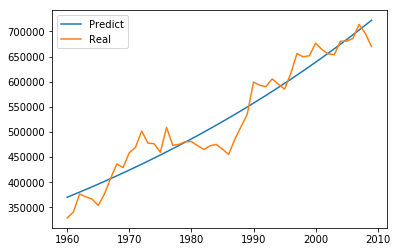

In [54]:
from math import exp
a=-0.013645860671492 
u=3.681857409782061e+05
x=range(1960,2010)
y=[(1-exp(a))*(  2.8313e+05
-u/a)*exp(-a*k) for k in range(50)]
plt.plot(x,y,label='Predict')
plt.plot(range(1960,2010),df[df.MSN=='TETCB'].Data.values,label='Real')
plt.legend()

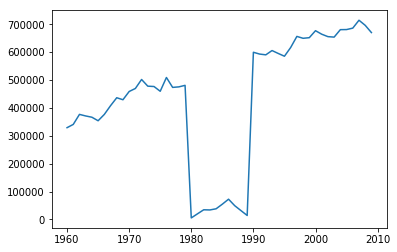

In [66]:
cancha=y-df[df.MSN=='TETCB'].Data.values
from scipy.optimize import curve_fit

def func(x,w,theta1,theta2,theta3):
    return (w*x**4)/(1-theta1*x-theta2*x*x-theta3*x*x*x)
popt,pcov = curve_fit(func,range(1960,2010), cancha)
popt

In [50]:
a=-0.017056067661885  
u=5.724779822499077e+06
k=12
(1-exp(a))*( 3.4517e+06-u/a)*exp(-a*k)

7037072.599956683

In [ ]:
wucha=[]
w=-0.067876
theta=0.005
for i in range(1960,2010):
    wucha.append((w*i)/(1-theta*i))
print wucha,cancha

In [5]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

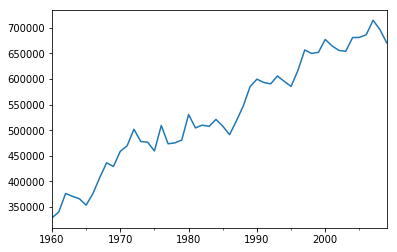

In [77]:
# df=pd.read_csv('NM.csv')
# dta=df[df.MSN=='TETCB'].Data.values
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
dta.plot()

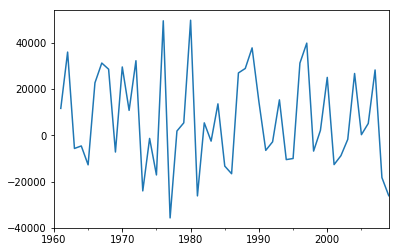

In [78]:
fig = plt.figure()
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

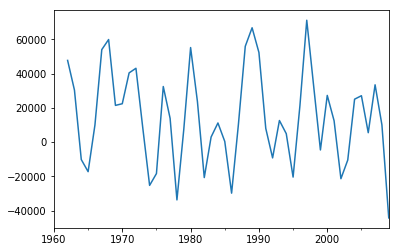

In [80]:
fig = plt.figure()
ax2= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

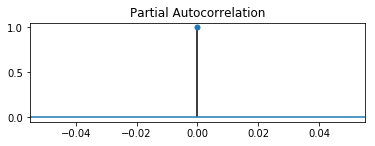

In [89]:
dta= dta.diff(3)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure()
# ax1=fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

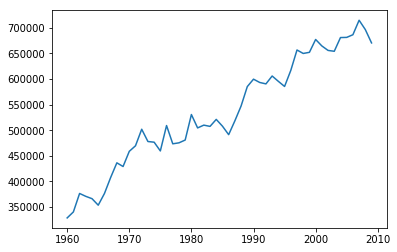

In [75]:
a=df[df.MSN=='TETCB'].Data.values
b=[]
for  i in range(len(a)):
    if (i>19)&(i<30):
        b.append(a[i]+randint(30000,50000))
    else:
        b.append(a[i])
        
plt.plot(range(1960,2010),b)   
dta=b

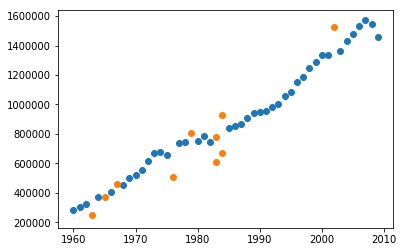

In [23]:
from random import randint
df=pd.read_csv('AZ.csv')
data=(df[df.MSN=='TETCB'].Data).values
noise=[]
xx=[]
for i in range(10):
    x=randint(0,49)
    xx.append(x+1960)
    noise.append(data[x]+randint(-200000,200000))
    
x=[]
y=[]
for item in range(1960,2010):
    if item in xx:
        continue
    else:
        x.append(item)
        y.append(data[item-1960])
plt.scatter(x,y,label='Raw')
plt.scatter(xx,noise,label='Noise')
nihe1=[]
nihe2=[]


In [13]:
i=0
for year in xx:
    y[year-1960]=noise[i]
    i+=1

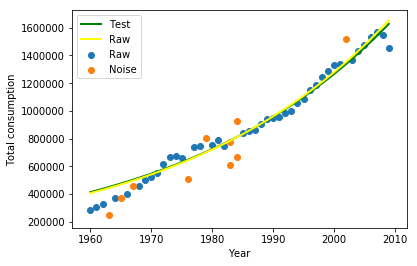

In [30]:
from math import exp
nihe1=[]
nihe2=[]
#新的
def func1(k):
    a=-0.027930799909886
    u=4.122297461180714e+05
    return (1-exp(a))*(  2.8313e+05-u/a)*exp(-a*k)
#旧的
def func2(k):
    a=-0.0286
    u= 4.0511e+05
    return (1-exp(a))*(  2.8313e+05-u/a)*exp(-a*k)
for i in range(0,50):
    nihe1.append(func1(i))
    nihe2.append(func2(i))
plt.plot(range(1960,2010),nihe1,label='Test',linewidth=2,color='green')
plt.plot(range(1960,2010),nihe2,label='Raw',linewidth=2,color='yellow')
plt.scatter(x,y,label='Raw')
plt.scatter(xx,noise,label='Noise')
plt.xlabel('Year')
plt.ylabel('Total consumption')
plt.legend()

In [39]:
1.76428245e+01-9.83238518e+02*65**1-6.09701385e+04*65**2+5.32325938e+05*65**3

145932347995.22665

In [33]:
total=0.0
for i in range(50):
    total+=(nihe1[i]-nihe2[i])**2
print total

4908564177.06


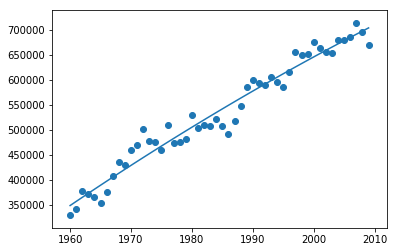

[ -2.01844319e+01   8.25239403e+03   3.48423028e+05]


In [42]:
df=pd.read_csv('temp.csv')
x=range(1960,2010)
y=df['total'].values
t=range(50)
z= np.polyfit(t, y, 2)
p= np.poly1d(z)
plt.plot(x,p(t))
plt.scatter(x,y)
plt.show()
print z

927644.59237694461